 The objective of this assignment is to implement PCA on a given dataset and analyse the results.

Download the wine dataset from the UCI Machine Learning Repository
Load the dataset into a Pandas dataframe.
Split the dataset into features and target variables.
Perform data preprocessing (e.g., scaling, normalisation, missing value imputation) as necessary.
Implement PCA on the preprocessed dataset using the scikit-learn library.
Determine the optimal number of principal components to retain based on the explained variance ratio.
Visualise the results of PCA using a scatter plot.
Perform clustering on the PCA-transformed data using K-Means clustering algorithm.
Interpret the results of PCA and clustering analysis.

In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [91]:
df=pd.read_csv("wine.csv")
df.drop(index=0,inplace=True)

In [92]:
df.head()

,1,14.23,1.71,2.43,15.6,127,2.8,3.06,.28,2.29,5.64,1.04,3.92,1065
1,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
2,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
3,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
4,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450
5,1,14.39,1.87,2.45,14.6,96,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290


In [93]:
df.columns=['Output','Alcohol','Malic acid','Ash','Alcalinity of ash','Magnesium','Total phenols','Flavanoids','Nonflavanoid phenols','Proanthocyanins','Color intensity','Hue','OD280/OD315 of diluted wines','Proline']

In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 176 entries, 1 to 176
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Output                        176 non-null    int64  
 1   Alcohol                       176 non-null    float64
 2   Malic acid                    176 non-null    float64
 3   Ash                           176 non-null    float64
 4   Alcalinity of ash             176 non-null    float64
 5   Magnesium                     176 non-null    int64  
 6   Total phenols                 176 non-null    float64
 7   Flavanoids                    176 non-null    float64
 8   Nonflavanoid phenols          176 non-null    float64
 9   Proanthocyanins               176 non-null    float64
 10  Color intensity               176 non-null    float64
 11  Hue                           176 non-null    float64
 12  OD280/OD315 of diluted wines  176 non-null    float64
 13  Proli

In [95]:
X=df.drop(columns=["Output"])
y=df["Output"]

In [96]:
X,y

(     Alcohol  Malic acid   Ash  Alcalinity of ash  Magnesium  Total phenols  \
 1      13.16        2.36  2.67               18.6        101           2.80   
 2      14.37        1.95  2.50               16.8        113           3.85   
 3      13.24        2.59  2.87               21.0        118           2.80   
 4      14.20        1.76  2.45               15.2        112           3.27   
 5      14.39        1.87  2.45               14.6         96           2.50   
 ..       ...         ...   ...                ...        ...            ...   
 172    13.71        5.65  2.45               20.5         95           1.68   
 173    13.40        3.91  2.48               23.0        102           1.80   
 174    13.27        4.28  2.26               20.0        120           1.59   
 175    13.17        2.59  2.37               20.0        120           1.65   
 176    14.13        4.10  2.74               24.5         96           2.05   
 
      Flavanoids  Nonflavanoid phenols

In [97]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=42)

In [98]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

In [99]:
numerical_pipe=Pipeline(steps=[
    ("Imputer",SimpleImputer(strategy='median')),
    ("Scaler",StandardScaler())

])

In [100]:
compose=ColumnTransformer(transformers=[
    ("numerical_cat",numerical_pipe,X.columns)
])

In [101]:
X_train=compose.fit_transform(X_train)
X_test=compose.fit_transform(X_test)

In [102]:
X_train.shape

(117, 13)

In [103]:
X_test.shape

(59, 13)

In [104]:
from sklearn.decomposition import PCA

In [105]:
pca=PCA(n_components=4)

In [106]:
X_train=pca.fit_transform(X_train)

In [107]:
X_train

array([[ 1.94855858e+00,  2.80531681e-01, -9.67667635e-01,
        -8.32126959e-02],
       [-3.50903657e+00, -1.16276719e+00,  3.22858349e-01,
        -9.92902953e-01],
       [ 1.70991016e+00,  2.25928336e+00, -5.04575404e-01,
        -1.89708411e+00],
       [ 1.97870553e+00,  1.07582577e+00, -1.83708797e+00,
        -7.01046973e-01],
       [-2.88284118e+00, -1.14612019e+00,  1.36096971e+00,
        -1.29502418e-01],
       [ 3.73982345e+00, -9.43387851e-01,  1.39204670e+00,
        -1.62142263e+00],
       [ 2.69918668e+00, -8.69387260e-01,  1.80308507e+00,
        -3.49176850e-01],
       [ 2.42885207e+00, -2.17843657e-01,  1.08563192e+00,
        -2.45849463e-01],
       [-2.52807293e+00, -6.37488869e-01,  6.91307322e-01,
         9.06896348e-02],
       [ 2.62125391e+00, -1.18629756e+00,  9.03077048e-01,
        -3.60552673e-01],
       [ 1.53484738e+00, -8.17657088e-01, -8.04865394e-01,
         9.91172689e-01],
       [ 1.18061616e+00,  2.68645164e+00,  1.17510996e+00,
      

In [108]:
pca.components_

array([[ 0.17085642, -0.24543659,  0.00389333, -0.21284231,  0.09402068,
         0.39155537,  0.42063493, -0.30395335,  0.33710022, -0.10101745,
         0.30155459,  0.37887553,  0.27468556],
       [-0.45970473, -0.27055896, -0.29569792,  0.01248702, -0.38351181,
        -0.03113115,  0.01266464,  0.02709569, -0.04564228, -0.50012134,
         0.27859408,  0.12701968, -0.36466143],
       [ 0.19904882, -0.05927213, -0.64038567, -0.59387491, -0.242714  ,
        -0.04660124, -0.07389137, -0.12758519, -0.08914309,  0.23022049,
        -0.1582414 , -0.14604309,  0.06283793],
       [-0.18119033, -0.39980927,  0.03456793, -0.15149012,  0.58986894,
        -0.18043687, -0.15331231, -0.34569815, -0.44749895, -0.06810797,
         0.16635939, -0.14224276,  0.08283264]])

In [109]:
pca.explained_variance_ratio_

array([0.38299192, 0.20274549, 0.11490761, 0.06743692])

<AxesSubplot: >

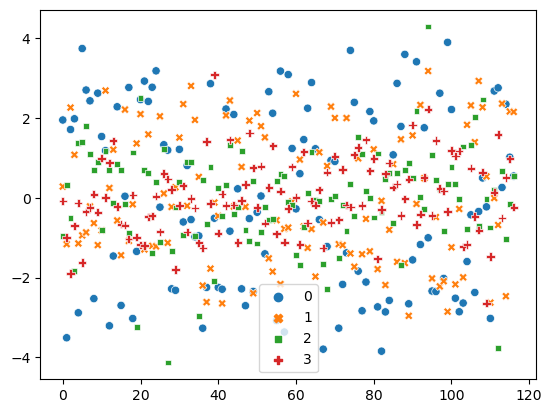

In [110]:
sns.scatterplot(data=X_train)

In [111]:
from sklearn.cluster import KMeans

In [112]:
wcss=[]
for i in range(1,11):
    kmens=KMeans(n_clusters=i,init="k-means++")
    kmens.fit(X_train)
    wcss.append(kmens.inertia_)

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:8

In [113]:
wcss

[1168.2526398510752,
 699.9416915215114,
 446.8198697531172,
 386.8539717057639,
 337.171831997225,
 299.01190350504976,
 272.7378834563673,
 259.0659089973645,
 234.2251736051035,
 221.41788663521115]

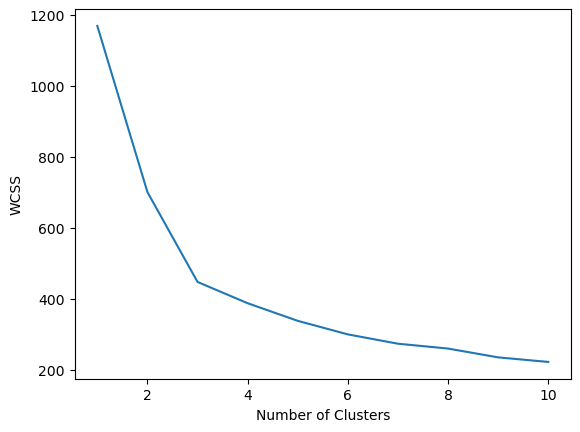

In [128]:
##plot the elbow curve
plt.plot(range(1,11),wcss)
##plt.xticks(range(1,11))
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()

In [114]:
%pip install kneed

Note: you may need to restart the kernel to use updated packages.


In [115]:
from kneed import KneeLocator

In [116]:
knee=KneeLocator(range(1,11),wcss,curve='convex',direction="decreasing")

In [117]:
knee.elbow

3

In [118]:
kmeans=KMeans(n_clusters=3,init="k-means++")

In [119]:
y_label=kmeans.fit_predict(X_train)

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


/opt/conda/lib/python3.10/site-packages/matplotlib/collections.py:967: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


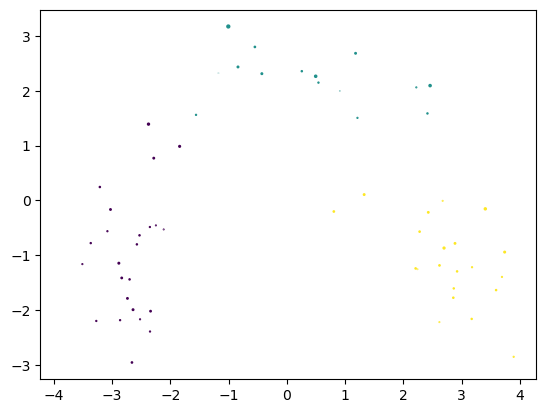

In [120]:
plt.scatter(X_train[:,0],X_train[:,1],X_train[:,2],c=y_label)

In [124]:
from sklearn.metrics import silhouette_score

In [126]:
silhouette_coefficient=[]
for i in range(2,11):
    kmeans=KMeans(n_clusters=i,init="k-means++")
    kmeans.fit(X_train)
    score=silhouette_score(X_train,kmeans.labels_)
    silhouette_coefficient.append(score)

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:8

In [127]:
silhouette_coefficient

[0.3625982543956897,
 0.4113150036845185,
 0.40589374688665913,
 0.34227587134167997,
 0.3604201860825926,
 0.2906058242099181,
 0.262522458144046,
 0.24381638576335707,
 0.23925188764911995]